In [167]:
import networkx as nx
G = nx.DiGraph()

In [168]:
    G.add_node("cpp_ldf-303", title = "Dataflow III")
    G.add_node("cpp_ldf-303", title = "Reasoning about Integer Sign Conversion")
    G.add_node("cpp_ldf-302", title = "Program Analysis III")
    G.add_node("cpp_ldf-401", title = "Program Analysis IV -- Dangling pointers")
    G.add_node("cpp_ldf-403", title = "Dataflow IV -- Reasoning about Runtime Values")
    G.add_node("cpp_ldf-203", title = "Dataflow II")
    G.add_node("cpp_ldf-303", title = "Dataflow III")
    G.add_node("cpp_ldf-202", title = "Reasoning about Control Flow II")
    G.add_node("cpp_ldf-201", title = "Elements of Syntactical Program Analysis II")
    G.add_node("cpp_ldf-103", title = "Dataflow I")
    G.add_node("cpp_ldf-102", title = "Reasoning about Control Flow I")
    G.add_node("cpp_ldf-101", title = "Elements of Syntactical Program Analysis I")
    G.add_node("beginner090", title = "Starting out", shape="oval")
    G.add_node("customizer190", title = "CodeQL customizer", shape="oval")


In [169]:
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

In [170]:
# set defaults
G.graph['graph']={'rankdir':'TD', 'fontsize':9}
G.graph['node']={'shape':'rect', 'fontsize':9}
G.graph['edges']={'arrowsize':'4.0', 'fontsize':9}

In [171]:
def ae(n1, n2):
    G.add_edge("cpp_ldf-%d" % n1, "cpp_ldf-%d" %n2)
G.add_edge("beginner090", "cpp_ldf-101")
G.add_edge("cpp_ldf-101", "cpp_ldf-102")
G.add_edge("cpp_ldf-101", "cpp_ldf-103")
G.add_edge("cpp_ldf-101", "cpp_ldf-201")
G.add_edge("cpp_ldf-102", "cpp_ldf-202")
G.add_edge("cpp_ldf-103", "cpp_ldf-203")
G.add_edge("cpp_ldf-102", "customizer190")
G.add_edge("cpp_ldf-103", "customizer190")
G.add_edge("cpp_ldf-203", "cpp_ldf-303")
G.add_edge("cpp_ldf-303", "cpp_ldf-403")
G.add_edge("cpp_ldf-201", "cpp_ldf-302")
G.add_edge("cpp_ldf-202", "cpp_ldf-302")
G.add_edge("cpp_ldf-203", "cpp_ldf-303")
G.add_edge("cpp_ldf-302", "cpp_ldf-401")
G.add_edge("cpp_ldf-303", "cpp_ldf-401")

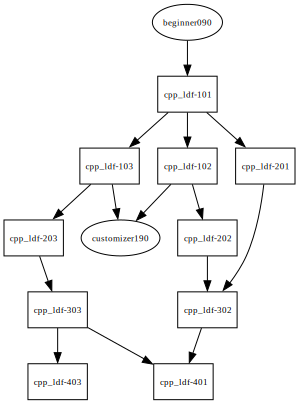

In [172]:
from IPython.display import SVG, display

def draw(graph):
    svg = nx.nx_agraph.to_agraph(graph).draw(prog='dot',format='svg')
    display(SVG(svg))
    
draw(G)

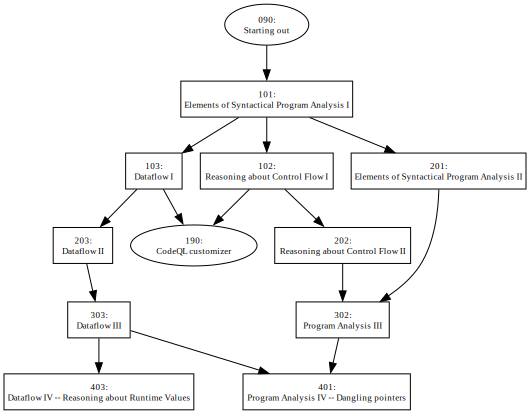

In [173]:
r0 = dict([name, name[-3:None]+":\\n "+dd['title']] for (name, dd) in list(G.nodes.items()))
G1 = nx.relabel_nodes(G, r0)
draw(G1)

And now get all nodes along a learning path

In [175]:
lp1 = list(nx.all_simple_paths(G, "beginner090", "customizer190"))
lp1

[['beginner090', 'cpp_ldf-101', 'cpp_ldf-102', 'customizer190'],
 ['beginner090', 'cpp_ldf-101', 'cpp_ldf-103', 'customizer190']]

And emphasize them

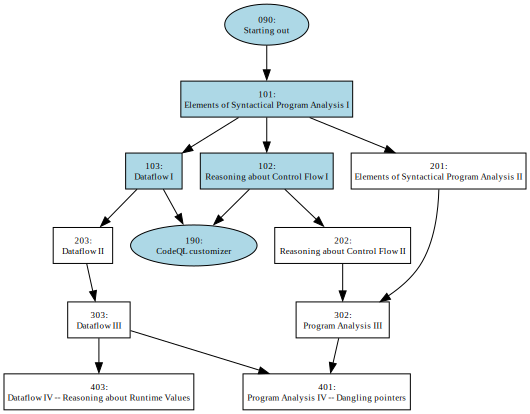

In [176]:
G2 = G.copy()
nv2 = G2.nodes()
for p0 in lp1:
    for n0 in p0:
        nv2[n0]['fillcolor'] = 'lightblue'
        nv2[n0]['style'] = 'filled'
G3 = nx.relabel_nodes(G2, r0)
draw(G3)

In [185]:
G3ag = nx.nx_agraph.to_agraph(G3)

In [187]:
G3ag.layout(prog='dot')

In [199]:
[G3ag.get_node(nd) for nd in G3ag.nodes_iter()]

['303:\\n Dataflow III',
 '401:\\n Program Analysis IV -- Dangling pointers',
 '403:\\n Dataflow IV -- Reasoning about Runtime Values',
 '302:\\n Program Analysis III',
 '203:\\n Dataflow II',
 '202:\\n Reasoning about Control Flow II',
 '201:\\n Elements of Syntactical Program Analysis II',
 '103:\\n Dataflow I',
 '190:\\n CodeQL customizer',
 '102:\\n Reasoning about Control Flow I',
 '101:\\n Elements of Syntactical Program Analysis I',
 '090:\\n Starting out']

In [204]:
[a0 for a0 in G3ag.get_node('090:\\n Starting out').attr]


['fillcolor', 'height', 'pos', 'shape', 'style', 'title', 'width']

In [205]:
G3ag.get_node('090:\\n Starting out').attr['pos']

'263,385.52'

In [210]:
for nd0 in G3ag.nodes_iter():
    print(nd0)
    for a0 in G3ag.get_node(nd0).attr:
        v0 = G3ag.get_node(nd0).attr[a0]
        print(' - ', a0, ": ", v0)

303:\n Dataflow III
 -  height :  0.5
 -  pos :  95,90
 -  title :  Dataflow III
 -  width :  0.86806
401:\n Program Analysis IV -- Dangling pointers
 -  height :  0.5
 -  pos :  323,18
 -  title :  Program Analysis IV -- Dangling pointers
 -  width :  2.3264
403:\n Dataflow IV -- Reasoning about Runtime Values
 -  height :  0.5
 -  pos :  95,18
 -  title :  Dataflow IV -- Reasoning about Runtime Values
 -  width :  2.6389
302:\n Program Analysis III
 -  height :  0.5
 -  pos :  339,90
 -  title :  Program Analysis III
 -  width :  1.2951
203:\n Dataflow II
 -  height :  0.5
 -  pos :  79,164.51
 -  title :  Dataflow II
 -  width :  0.82639
202:\n Reasoning about Control Flow II
 -  height :  0.5
 -  pos :  339,164.51
 -  title :  Reasoning about Control Flow II
 -  width :  1.8889
201:\n Elements of Syntactical Program Analysis II
 -  height :  0.5
 -  pos :  435,239.01
 -  title :  Elements of Syntactical Program Analysis II
 -  width :  2.4306
103:\n Dataflow I
 -  fillcolor :  ligh

In [180]:
from pyvis import network as net

pg = net.Network(directed=True, notebook=True)
pg.from_nx(G)
## pg.show_buttons(filter_=True)
pg.show("G.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [182]:
pg1 = net.Network(directed=True, notebook=True)

pg1.from_nx(G1)
pg1.show_buttons(filter_='physics')
pg1.show("G.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [ ]:
list(G.nodes())[0]


In [ ]:
list(G.nodes.items())
